# 1. Spark의 시작

## 빅데이터와 구글의 분산 컴퓨팅

* 데이터가 폭발적으로 증가함에 따라 Google과 같이 엄청난 속도로 전 세계의 데이터를 색인하고 검색하는 초대규모 검색엔진들은 한계에 봉착
* RDBMS와 같은 전통적인 저장 시스템과 프로그래밍 수단들은 이러한 초 대규모의 색인 생성, 검색 등의 인터넨 문서 가공 불가능
* 이를 해결하기 위하여 2003년 구글에서 다음의 3가지로 구성된 GFS논문을 통해 컴퓨팅 차원의 해결책을 제시

    - **구글 파일 시스템(Google File System, GFS)**: 클러스터를 구성해 상용 서버와 장애 내구성이 있는 분산 파일시스템 제공
    - **빅테이블(BigTable)**: GFS기반으로 구조화된 대규모 데이터에 대한 저장 수단 제공
    - **맵리듀스(MapReduce, MR)**: 함수형 프로그래밍 개념을 기반으로 GFS와 BigTable위에서 대규모 데이터 병렬처리를 수행하는 분산 컴퓨팅 모델

### GFS기반의 대용량 데이터 분산 처리 프로세스

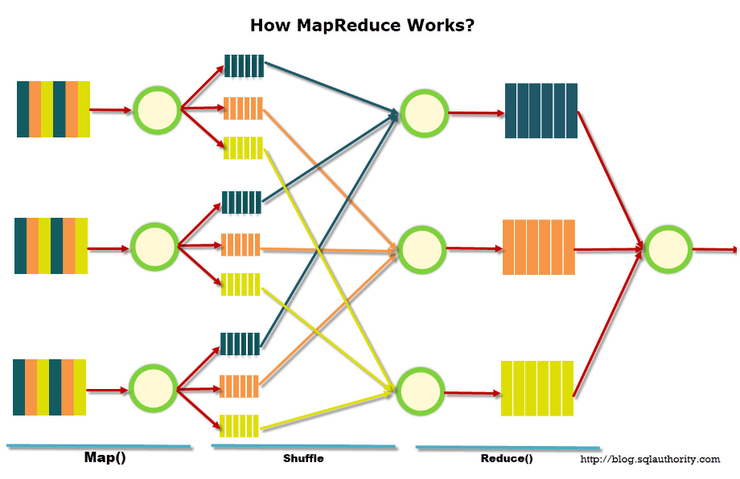

1. MapReduce애플리케이션은 필요한 데이터를 애플리케이션으로 가져오는게 아니라, 시스템과 연계하여 데이터의 지역성, 랙의 근접성 등을 고려하여 데이터가 존재하는 곳으로 연산 코드(Map함수와 Reduce함수)를 전송
2. **맵(Map)단계**: 데이터를 레코드별로 분할해 워커노드들에 전달한 후 각 레코드에 Map함수를 적용 -> Map함수는 Key-Value 쌍을 생성하여 중간결과를 생성
3. **셔플(Suffle)단계**: 맵 단계에서 생성된 중간결과들을 취합하여 동일한 Key를 지닌 중간결과들을 동일한 리듀서로 보낼 수 있도록 데이터를 정렬하고 분배
4. **리듀스(Reduce)단계**: 셔플 단계를 거친 중간 결과들에 Reduce함수를 적용 -> 동일한 Key를 가진 쌍들의 Value들을 하나로 합쳐 최종 결과를 생성
5. 생성한 최종 결과를 애플리케이션이 접근 가능한 분산 저장소에 기록
* ex): MapReduce를 사용한 단어 빈도수 카운트

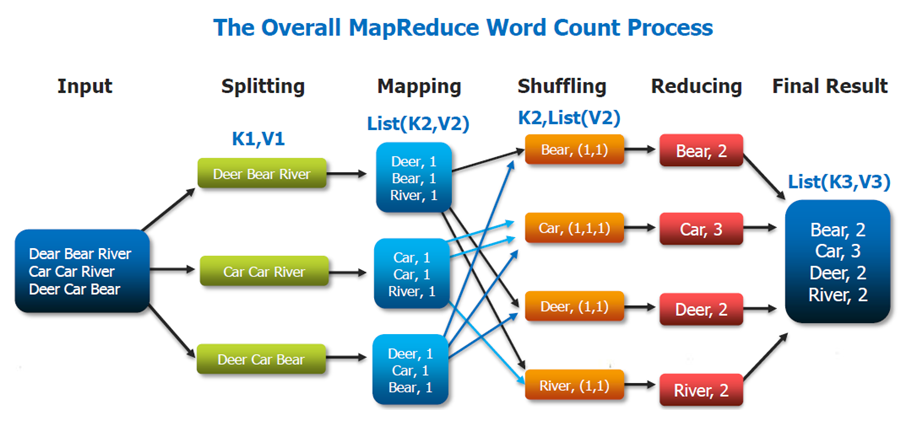

* 이러한 접근법은 Hadoop파일 시스템(Hadoop File System, HDFS)과 분산 컴퓨팅 프레임워크로서의 MapReduce구현의 기반이 되었으며, 2006년 비영리 재단 Apache에 이관됨으로써 Hadoop프레임워크의 일부가 되었다. (Hadoop 공통모듈, MapReduce, HDFS, YARN)

## HDFS상 MapReduce의 문제점

MapReduce가 적용된 Hadoop은 많은 곳에 광범위하게 적용되었으나 몇가지 단점이 존재
1. 번거로운 운영 복잡도로 인하여 관리가 쉽지 않음
2. 배치 처리를 위해서 MapReduce API는 장황하고 많은 양의 기본 셋업 코드를 필요로 하며, 장애 대응에 있어서도 불안정
3. 방대한 배치 데이터 작업을 수행하기 위해선 수많은 MapReduce테스크가 필요 -> 이때 각 테스크들은 이후 테스크를 위해 중간 과정 데이터를 로컬 디스크에 기록 -> 이는 로컬 디스크에 반복적인 I/O수행을 유발 -> 따라서 거대한 MapReduce연산 처리 시 많은 시간 소요
4. Hadoop MapReduce는 일반적인 배티 처리를 수행하기 위한 대규모 작업에 사용하기에는 적당하지만, 머신러닝, 스트리밍, 상호 반응하는 SQL계통 질의 등 다른 워크로드들과 연계하여 사용하기에는 부적합

* 새로운 종류의 워크로드들을 다루기 위해서 엔지니어들은 해당 용도에 알맞은 다양한 시스템들을 만들어 냈지만((이하 모두 Apache 산하) HIVE, Storm, Impala, Drill, Mahaout 등), 이 또한 다음의 문제점들이 존재
* 각각 시스템만의 API와 클러스터 설정 방식을 지님 -> 개발자들이 배우고 사용하기 어려움
* 추가적인 Hadoop운영에 대한 부담 존재
* 따라서 동적이고 반복적인 컴퓨팅 작업에서 MapReduce가 비효율적인 부분이 있으며, 배우고 다루기 복잡한 프레임워크란 점을 해결하고자 더욱 단순하고 빠른 방법을 모색하는 과정에서 Spark개발이 시작되었다.

# 2. Apache Spark

데이터 센터나 클라우드에서 대규모 분산 데이터 처리를 수행하기 위하여 설계된 통합형 오픈소스 분석엔진

* 중간 연산을 위한 메모리 저장소를 지원하여 Hadoop MapReduce보다 훨씬 빠르게 동작
* 다양한 워크로드들을 위해 쉽게 사용 가능한 API들로 이뤄진 라이브러리를 지니며 가장 대표적인 라이브러리는 다음과 같다
    - MLlib: 머신러닝
    - Spark SQL: SQL기반 대화형 질의
    - Spark Streaming: 실시간 데이터 처리를 위한 스트리밍 작업
    - GraphX: 분산 그래프 처리

* Spark는 개발 배경 및 설계 철학에 따른 4가지 특성 존재
* 속도
    - 하드웨어의 빠른 발전을 효과적으로 활용할 수 있도록 최적화
    - 데이터 처리작업을 방향성 비순환 그래프(Directed Acyclic Graph, DAG)로 구성
        - DAG스케줄러와 최적화 모듈이 효율적인 연산 그래프 산출
        - 작업을 각각의 테스크로 분해한 후 클러스터 내 워커 노드에서 병렬 사용
    - 물리적 실행 엔진인 텅스텐(Tungsten)에서 전체적 코드 생성(whole-stage code generation)이라는 기법을 사용하여 실행을 위한 간결한 코드 생성
    - 모든 중간 결과는 메모리에 유지되며, 따라서 디스크 I/O를 제한적으로 사용하므로 성능을 큰 폭으로 향상

* 사용 편리성
    - 데이터프레임, 데이터세트 같은 고수준 데이터 추상화 계층 아래, '탄력적인 분산 데이터세트(Resilient Distributed Dataset, RDD)'라 불리는 핵심적이면서도 단순한 논리 자료구조를 구축하여 단순성 실현
    1. 연산(operation)을 크게 트랜스포메이션(transformation)과 액션(action)의 집합으로 제공
    2. 단순한 프로그래밍 모델을 제공함으로써 사용자들이 각자 편한 언어로 빅데이터 애플리케이션을 개발 가능

* 모듈성
    - 다양한 라이브러리의 컴포넌트들을 다 같이 하나의 엔진 안에서 연결된 상태로 사용 가능 -> 하나의 스파크 애플리케이션을 작성함으로써 지원되는 모든 것이 실행 가능해지며, 다른 직업을 위해 별도의 API를 배울 필요도 없어짐
    - 머신러닝, 스트리밍, 대화형 SQL등 다양한 워크로드에 적용 가능
    - 지원하는 모든 프로그래밍 언어로 표현 가능(Python, Scala, Java, SQL, R)
    - 문서화가 잘된 API들로 이뤄진 통합 라이브러리 제공

* 확장성
    - 저장과 연산을 모두 포함하는 Hadoop과 달리, Spark는 이 둘을 분리하여 저장보다는 빠른 병렬 엔진에 집중
    - 수많은 데이터 소스에서 데이터를 읽어들여 메모리에서 처리 가능(Apache Hadoop, Apache Cassandra, Apache HBase, Apache Hive, MongoDB, RDBMS 등)
    - Spark의 DataFrameReader와 DataFrameWriter클래스는 다양한 데이터 소스에서 데이터를 읽어와 논리적 데이터 추상화 레벨에서 처리 가능(Apache Kafka, Kinesis, Azure Storage, AWS S3 등)

# 3. 빅데이터 처리를 위한 통합 엔진

## 단일화된 스택으로서 Spark 컴포넌트

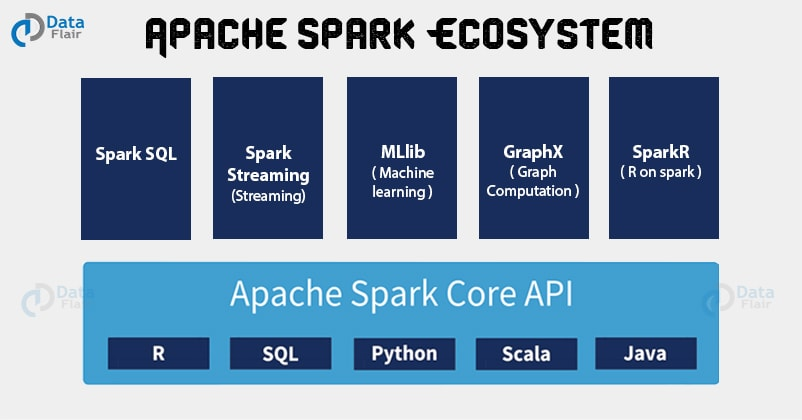

* Spark는 단일 분산 처리 엔진 위에서 다양한 워크로드를 처리할 수 있는 통합된 컴포넌트 스택
* 각각의 컴포넌트(Spark SQL, Spark Streaming, Spark Mllib, Spark GraphX)는 Spark의 중심 장애 대응 엔진과는 별도로 존재 -> API를 사용하여 Spark 어플리케이션을 만들면, Spark Core엔진이 적절한 DAG로 변환하여 실행
* Scala, SQL, Python, JAVA, R 중 어떤 언어로 스파크 코드를 작성해 정형화 API를 사용하더라도, 실제 코드는 고도로 경량화된 바이트코드로 변환되어 클러스터 전체에 분산된 워커노드의 JVM에서 실행

### Spark SQL
* 구조화된 데이터에서 잘 동작
* RDBMS 테이블이나 구조화된 데이터의 파일 포맷(CSV, 텍스트, Avro, ORC, Parquet 등)에서 데이터를 읽어들일 수 있으며, 그 데이터로 영구적/임시적인 테이블 생성 가능
* Scala, Python, JAVA, R로 Spark 정형화 API를 사용하여 SQL계통 질의를 통해 데이터를 바로 데이터프레임으로 읽어들일 수 있음
* 순수한 SQL 엔진처럼 동작 가능

## Spark Streaming
* Apache Kafka와 같은 데이터 소스에서 들어오는 스트리밍 데이터나 정적 데이터를 실시간으로 연결하고 반응하기 위하여 사용
* 스트림을 연속적으로 증가하는 테이블이자, 끝에 계속 새로운 레코드가 추가되는 형태로 간주 -> 개발자들은 스트림을 정형화된 테이블로 보고, 정적인 테이블에 하듯이 쿼리만 날리면 됨
* 정형화 스트리밍 모델 하부에는 Spark SQL엔진이 장애복구와 지연 데이터의 모든 측면을 관리 -> 개발자들이 상대적으로 쉽게 스트리밍 애플리케이션을 작성할 수 있게 해줌

### Spark MLlib
* 모델 구축을 위한 고수준 데이터프레임 API를 기반으로 여러 인기있는 머신러닝 알고리즘 제공
* 모델 관리, 선형대수 연산, 경사하강법 최적화 등 그 외 머신러닝 기능들 또한 포함

Spark 1.6버전부터 MLlib은 두개의 패키지로 분리
1. spark.mllib: RDD베이스, 지금은 유지보수를 위해 사용
2. spark.ml: 데이터프레임 기반 API, 모든 새로운 기능은 이제 여기에 포함
* 자료에서 사용하는  'MLlib'는 spark.mllib이 아닌, Spark의 머신러닝 통합 라이브러리를 의미

### GraphX
* 그래프(SNS 팔로우 관계 그래프, 경로, 연결점, 네트워크망 구성 그래프 등)를 가공, 분석, 최적화하며, 그래프 병렬 연산을 수행하기 위한 라이브러리
* 분석, 연결 탐색 등 표준적인 그래프 알고리즘을 포함한 다양한 알고리즘 제공
* 대규모 그래프 데이터를 효과적으로 처리 가능
* GraphX는 그래프 시각화가 아닌, 그래프 처리를 위한 라이브러리 -> GraphX자체로는 그래프를 그리기에 적합하지 않지만 처리된 그래프 데이터를 다른 시각화 라이브러리(Matplotlib, Plotly 등)에 넘겨 시각화 가능

## Spark의 클러스터 아키텍쳐

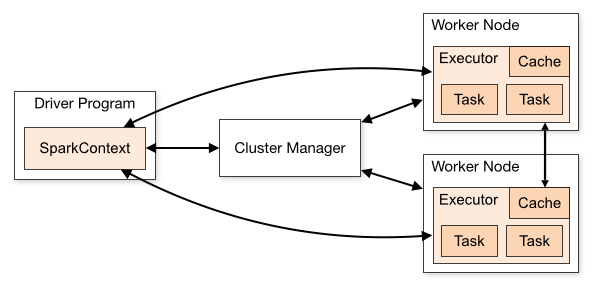

* 위 그림은 Spark 클러스터 아키텍쳐를 도식화한 것
* 넓은 범위에서 볼 때, 하나의 Spark 애플리케이션은 Spark클러스터의 병렬작업을 조율하는 하나의 Driver Program으로 이루어짐
* 드라이버 프로그램은 SparkSession객체를 통해 클러스터 내 분산 컴포넌트들(Cluster Manager와 Spark Executor)에 접근

## 분산 처리 프로세스

1. 애플리케이션 시작: 사용자는 애플리케이션을 실행하면서 Driver Program을 시작, Driver Program SparkSession 객체 초기화(SparkContext객체는 SparkSession객체 생성 시 간접적으로 생성)
2. Cluster Manager와 연결<br>  Driver program - Cluster Manager와 통신하여 Executor들을 위해 필요한 리소스(CPU, 메모리 등) 요청
3. Spark Executor 시작 <br> Cluster Manager - 사용자가 지정한 리소스 제약에 따라 적절한 Worker Node에 요청받은 리소스를 할당하여 Executor 시작
4. Task 스케줄링 <br> Driver Program - 실행계획(DAG, 스케줄링)을 생성하고 계획에 따라 작업을 Task로 분할한 후 Spark Executor에 분배
5. 결과 수집 및 애플리케이션 종료 <br> Executor - Driver Program에서 전달받은 Task를 실행하고, 결과를 Driver Program에 반환 <br> Driver Program - 모든 Task가 완료되면 Executor로부터 실행결과를 수집하고 처리, 이후 Cluster Manager에게 리소스 해제 요청 및 애플리케이션 종료 신호 전송 <br> Cluster Manager - Driver Program이 보낸 종료 신호 감지 후 Executor들에 종료 신호 전송 <br> Executor - 사용한 리소스를 반환하고 종료

### Spark Driver(Driver Program)

* Spark애플리케이션의 일부로서 SparkSession 객체 초기화를 포함한 여러가지 역할 수행
    - 애플리케이션의 실행을 시작하고 종료: Spark 애플리케이션의 진입점 역할을 수행
    - SparkSession 및 SparkContext 생성 및 관리
    - 작업 스케줄링 및 테스크 관리: 모든 작업을 DAG 연산 형태로 변환하고 스케줄링, 또한 작업 진행 상황을 모니터링하고, 실패한 테스크를 다시 시작하거나 중복 실행 하는 등 오류 복구 작업을 수행
    - 결과 집계 및 반환
    
* 자원의 할당된 이후부터는 Executor와 직접 통신
* 애플리케이션의 수명 동안 실행되며, Driver가 실패하거나 중단되면 애플리케이션 전체가 종료되므로 안정적인 환경에서 실행되어야 함

### SparkSession

* 모든 Spark 연산과 데이터에 대한 통합 연결 채널 역할을 수행하는 객체 -> 모든 Spark기능을 한 군데에서 접근할 수 있는 시각점을 제공
* SparkContext, SQLContext, HiveContext, SparkConf, StreamingContext등을 모두 통합해 Spark작업을 훨씬 간단하고 쉽게 만들어줌
* SparkSession이 애플리케이션의 모든 작업을 관리하는 기본 객체라면, SparkContext는 클러스터와의 연결을 관리하며, 리소스 할당, 테스크 분배를 담당하는 객체
* SparkContext는 SparkSession에 통합되어있으며, 일반적으로 SparkSession객체를 사용하면서 간접적으로 생성됨
* 필요한 경우, 사용자는 SparkContext 객체를 명시적으로 생성하여 사용이 가능하다.

### Cluster Manager

* Spark 애플리케이션이 실행되는 클러스터에서 리소스 관리 및 할당을 책임진다.
* 현재 Spark는 4종류의 Cluster Manger를 지원함
    * 내장 단독 클러스터 매니저(Standalone)
    * 아파치 하둡 얀(Yarn)
    * 아파치 메소스(Mesos)
    * 쿠버네티스(Kubernetes)

### Spark Executor

* Executor는 Worker Node에서 동작
* Driver Program과 통신하여 Task를 실행하는 역할
* 대부분의 배포 모드에서 노드당 하나의 Executor만이 실행됨

## 배포 모드

* Spark는 여러 다른 환경에서 원활히 돌아갈 수있도록 다양한 배포 모드를 지원
* Cluster Manager는 Executor를 관리 가능하고 자원 요청이 잘 수행될 수 있는 환경이라면 어디에서든 돌아갈 수 있도록 추상화 되어 있다.


* Spark 배포 모드 요약표

|모드|Spark Driver|Cluster Manager|Executor|
|---|---|---|---|
|로컬|랩톱, 단일 서버같은 머신에서 단일 JVM 위에서 실행|동일한 호스트에서 실행|드라이버와 동일한 JVM 위에서 동작|
|단독|클러스터의 아무노드에서나 실행가능|클러스터의 아무 호스트에나 할당 가능|클러스터의 각 노드가 자체적인 Executor JVM 실행|
|얀(클라이언트)|클러스터 외부의 클라이언트에서 동작|얀의 리소스 매니저가 얀의 애플리케이션 마스터와 연계하여 노드 매니저에 Executor를 위한 컨테이너들을 할당|얀의 노드 매니저의 컨테이너|
|얀(클러스터)|얀 애플리케이션 마스터에서 동작|얀(클라이언트)모드와 동일|얀(클라이언트)모드와 동일|
|쿠버네티스|쿠버네티스 팟에서 동작|쿠버네티스 마스터|각 워커가 자신의 팟 내에서 실행|


## 분산 데이터와 파티션

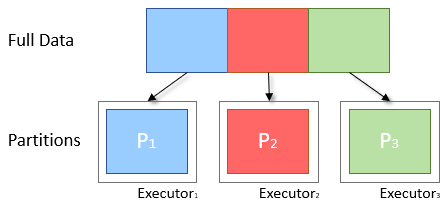

* 실제 물리적인 데이터는 파티션으로 분할되어 HDFS나 클라우드에 존재하는 저장소 전체에 분산
* Spark는 이렇게 물리적으로 분산된 각 파티션을 고수준으로 추상화된 논리적 데이터, 즉 메모리의 데이터프레임 객체로 간주
* 각 Executor가 데이터의 지역성을 고려하여 가급적이면 네트워크 상 가장 가까운 곳에서 파티션을 읽어들일 수 있도록 Task 할당
* 이러한 파티셔닝은 효과적인 병렬처리를 가능하게 한다.
* 각 Executor가 사용하는 CPU코어가 하나의 데이터 파티션을 가져다 Task를 처리하게 함으로써 네트워크 사용을 최소화하여 가까이 있는 데이터만 처리할 수 있게 함

# 4. Spark 설치

* 구성 가능한 Spark의 클러스터 모드는 다음과 같다.
* 로컬 모드(Local Mode): 모든 처리가 하나의 머신에서 이루어짐
* Cluster Mode: 복수의 머신으로 Spark작업을 위한 노드 및 클러스터 구성, Cluster Manager로 어떤 것을 사용하느냐에 따라서 유형이 나뉜다.
    - 내장 단독 클러스터 매니저(Standalone Deploy Mode)
    - 아파치 하둡 얀(Hadoop YARN)
    - 아파치 메소스(Apache Mesos)
    - 쿠버네티스(Kubernetes)
* 본문에선 Local Mode를 설치
    - Spark 프레임워크를 익히면서 반복적인 Spark수행을 통해 빠른 피드백 획득 가능
    * 하지만 분산 처리가 필요하거나 대용량 데이터를 다루는 작업에는 부적합(Yarn, Kubernetes 사용 필요)

## 1. Apache spark 설치

### Java 설치

* Spark는 Scala로 개발되었기 때문에 JVM상에서 구동됨. 따라서 Java 환경 구성 필요
* 기존에 Hadoop구축 시에 이미 설정을 완료하였으므로 과정은 이전 파일 참조

### Apach Spark 다운로드

In [ ]:
# Spark 3.4.0 다운로드
wget https://dlcdn.apache.org/spark/spark-3.4.0/spark-3.4.0-bin-hadoop3.tgz

In [ ]:
# 압축 해제
# -x: 파일 추출
# -f: 작업할 파일 이름 지정
tar -xf spark-3.4.0-bin-hadoop3.tgz

In [ ]:
# 디렉토리를 /usr/local/spark로 변경
sudo mv spark-3.4.0-bin-hadoop3 /usr/local/spark

In [ ]:
# SPARK_HOME 사용자 환경변수 설정
echo 'export SPARK_HOME="/usr/local/spark"' >> ~/.bashrc

In [ ]:
# 변경사항 적용
source ~/.bashrc

## 2. Spark 디렉토리와 파일

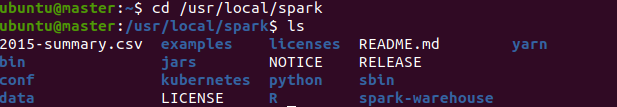

### bin
* Spark shell들(spark-sql(SQL), pyspark(Python), spark-shell(Scala), sprkR(R))을 포함해서 Spark 애플리케이션을 실행하는 데 사용되는 실행 가능한 스크립트 파일들을 포함

### sbin
* 다양한 배포모드에서 클러스터의 Spark컴포넌트들을 시작하고 중지하기 위한 관리 목적의 스크립트들을 포함

### conf
* spark-defaults.conf, spark-env.sh, log4j.properties등의 Spark 설정 파일들을 포함
* 대부분의 경우 이들 파일들은 템플릿 형태로 제공되며 필요에 따라 복사하여 수정해 사용

### jars
* Spark실행에 필요한 Java라이브러리들을 포함

### python
* PySpark를 위한 Python라이브러리들을 포함

### data
* Spark 예제에서 사용하는 샘플 데이터를 포함

### examples
* 다양한 Spark기능들을 보여주는 예제 코드들을 포함

### licenses
* Spark와 관련된 각종 라이센스 정보를 포함

### README.md
* Spark에 대한 일반적인 정보와 간단한 사용 예제, 빌드방법 등을 포함

# 5. pyspark 사용

* Spark는 대화형 셀로 동작하며 광범위하게 사용되는 SQL, Python, Scala, R에 대한 인터프리터를 포함한다.
* 이 중 Python에 해당하는 것이 pyspark이다.
* $SPARK_HOME/bin 디렉토리 안의 pyspark 파일 실행
* shell을 빠져나가려면 exit()를 입력하거나 ctrl+d를 누른다.

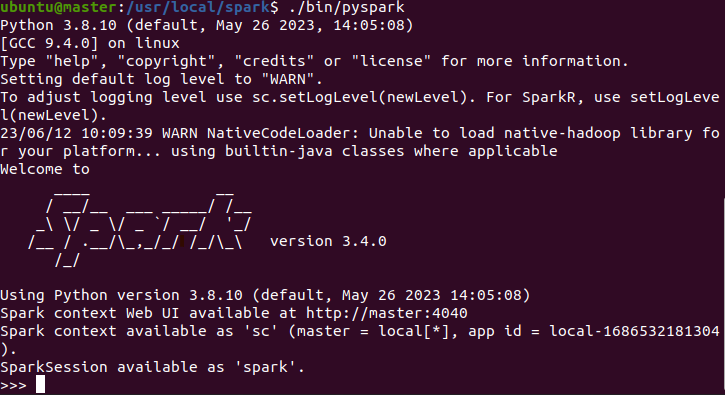

# 6. Spark Application

## 1. Spark Application

* API를 사용하여 Spark프레임워크 위에서 실행되는 사용자 정의 프로그램
* Spark Application은 다음과 같은 구성요소들을 지님

### Driver Program
* Spark Application의 실행을 제어하는 프로그램
* SparkSession을 생성하고, 작업을 정의/스케줄링하며, 데이터를 분할하고, 결과를 취합

### SparkSession
* Spark코어 기능들과 상호작용할 수 있는 진입점
* Spark코어의 API로 프로그래밍을 할 수 있게 해주는 객체
* Spark shell(pyspark)에서는 Driver Program이 SparkSession을 자동 생성하여 'spark'라는 기본 변수로 제공하지만, pyspark를 사용하지 않고 Spark Application을 작성하는 경우에는 사용자가 SparkSession객체를 생성해서 써야 한다.

### Executor
* 각 클러스터 노드에서 실행되는 프로세스
* 작업을 수행하고, 결과를 Driver Program에게 보고

### job
* Spark Application이 action을 호출할 때 이에 대한 응답으로 생성되는 병렬 연산
* Action이 호출되면 Driver Program은 lazy evaluation에 따라 이전에 선언되었지만 실제로 연산이 이뤄지지 않은 transformation들을 참조하여 하나 이상의 job을 생성
* Job을 실행하기 위해 필요한 Stage와 Task를 계산 및 스케줄링하여 각 Job을 DAG로 변환 -> 이 DAG가 Spark의 실행계획이 되며, DAG에서 각각의 노드는 하나 이상의 Stage에 해당


* DAG예시

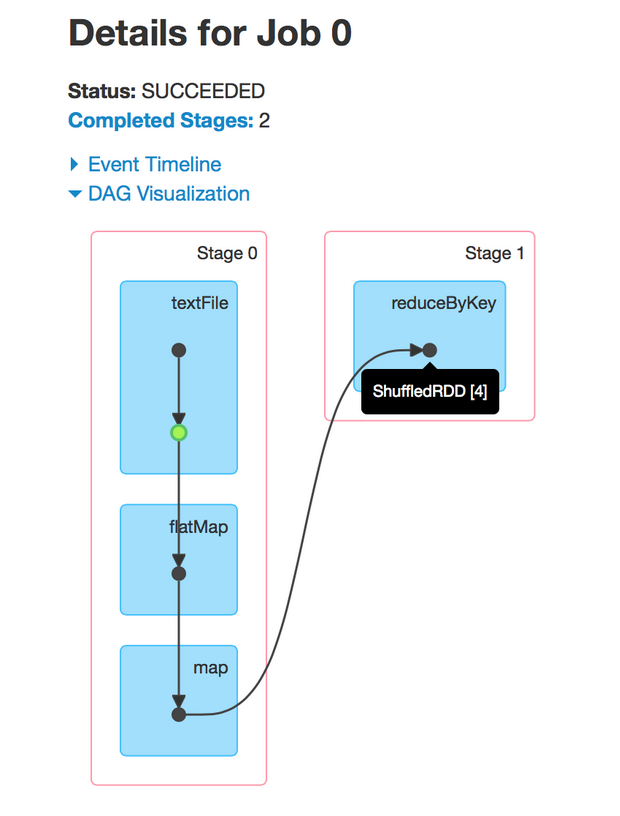

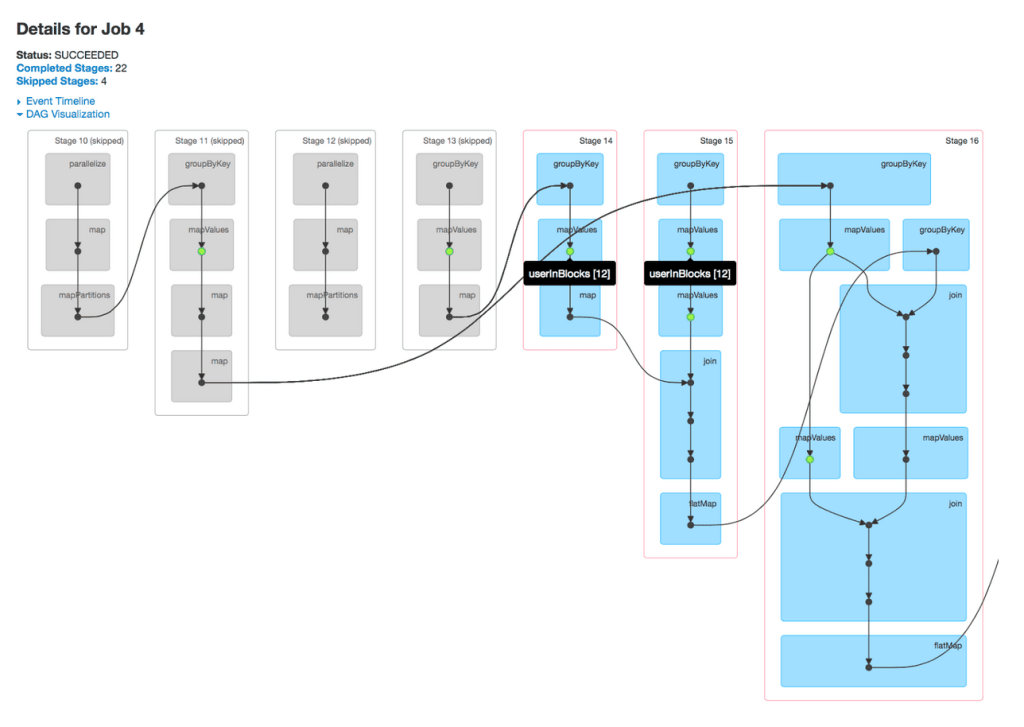

### Stage
* Job은 여러개의 Stage로 나뉘어짐
* Stage는 서로 의존성을 지니는 여러개의 Task들로 구성됨
* 각 Stage들은 데이터 셔플이 필요없는 연속적인 변환으로 연결

### Task
* Executor에게 보내지는 가장 기본적인 작업단위
* 각 Executor는 개별적 할당된 CPU코어를 가지고 데이터의 개별 파티션에 대한 Task를 맡아 연산을 수행 -> 16코어 Executor는 16개 이상의 파티션에 대한 16개 이상의 Task를 할당받아 작업

## SparkSession

* Spark Application을 프로그래밍하기 위해서는 먼저 그 진입점인 SparkSession을 생성해야 한다.
* 하나의 Spark Application에 복수의 SparkSession을 생성하고 각기 다른 설정으로 실행 가능
* 하지만 여러 SparkSession을 동시에 운영하면 같은 리소스를 공유하므로 각 세션에서 사용가능한 리소스가 제한될 수 있으며 복잡성을 증가시킬 수 있으므로 필요한 경우에만 사용

### SparkSession 생성

In [ ]:
# SparkSession import
from pyspark.sql import SparkSession

# pyspark에서 이전에 실행되고 있던 SparkSession 객체 종료
spark.stop()

# SparkSession객체 Spark생성
spark = SparkSession.builder\
    .appName('SparkEx')\
    .getOrCreate()
spark

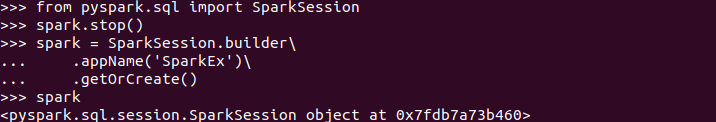

* stop(): SparkSession 객체 종료
* SparkSession.builder<br>
    - 명령어 체인을 통해 새로운 SparkSession을 생성하는데 사용
    - SparkSessionBuilder.Builder 타입 변수 반환
* appName()<br>
    - Spark application의 이름 설정
    - Spark 웹 UI내에서 해당 Spark application을 식볋하는데 사용
* getOrCreate()<br>
    - SparkSession 객체를 얻는 메소드
    - 이미 SparkSession이 존재하면 해당 SparkSession을 반환
    - 없다면 새로운 SparkSession을 생성해서 반환
    - 같은 애플리케이션이 여러 SparkSession을 가지는 것을 방지

### SparkSession 내 설정 변경

In [ ]:
spark.conf.set("spark.sql.shuffle.partitions", "50")
spark.conf.get("spark.sql.shuffle.partitions")
config_dict = spark.sparkContext.getConf().getAll()
config_dict

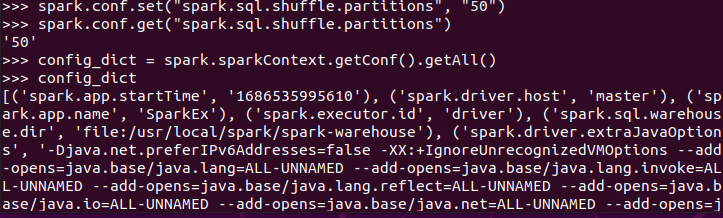

* conf.set(): 인자로 '설정명', '값'을 전달하여 설정 변경
* conf.get(): 인자로 '설정명'을 전달하여 현재 입력되어 있는 설정값 확인
* sparkContext.getConf().getAll()<br>
    - sparkContext의 모든 설정을 (key, value)의 list로 반환
    - sparkContext의 설정만을 포함 -> spark.sql.shuffle.partitions는 Spark SQL의 설정이므로 conf.get()을 통해 확인

### 파일을 DataFrame으로 읽어오기

In [ ]:
# 터미널을 하나 더 열어서 파일 다운로드
wget https://github.com/FVBros/Spark-The-Definitive-Guide/raw/master/data/flight-data/csv/2015-summary.csv

In [ ]:
# 다시 pyspark를 실행한 터미넣로 가서 결과 출력
df = spark.read.option('header', 'true').csv('./2015-summary.csv')
df = spark.read.format('csv').option('header', 'true').load('./2015-summary.csv')
df.show()

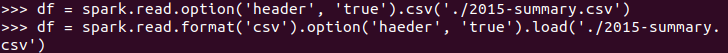

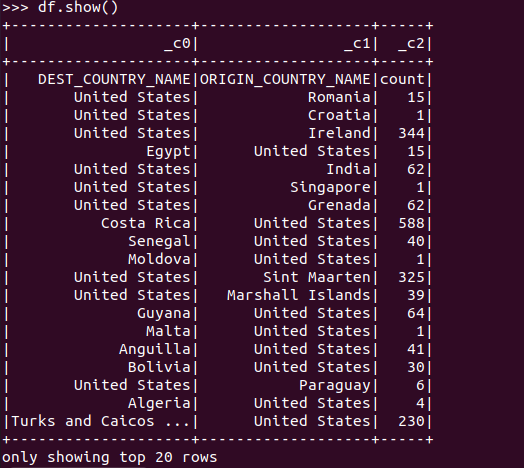

* read()<br>
    - 명령어 체인을 통해 파일을 DataFrame의 형태로 읽음
    - 위 아래 모두 같은 결과를 반환
    - 다양한 포맷들을 DataFrame형태로 로드 가능 -> text는 .text(), .format('text'), json은 .json(), .format('json'), ...
    
* option()<br>
    - read()사의 option 지정
    - conf.set()과 마찬가지로 '옵션명', '값'의 2가지 인자 전달

### 현재 SparkSession에서 접근 가능한 database와 table 확인

In [ ]:
spark.catalog.listDatabases()
spark.catalog.listTables()

* catalog.listDatabases(): 현재 SparkSession에서 접근 가능한 database목록을 list로 반환
* catalog.listTables(): 현재 SparkSession에서 접근 가능한 table 목록을 lsit로 반환

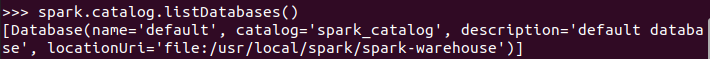

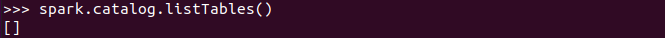

## SparkContext

* SparkSession이 등장하기 전에 사용되었던 진입점 객체
* 지금은 SparkSession객체 생성 시 간접적으로 생성되며, SparkContext의 많은 부분을 SparSession이 대체하고 있기 때문에 잘 사용하지 않는다.

### SparkContext 생성

In [ ]:
from pyspark import SparkConf, SparkContext
sparkConf = SparkConf().setAppName('context_ex')
sc = SparkContext(conf=sparkConf)

# 오류 발생 시
sc.stop()
from pyspark import SparkConf, SparkContext
sparkConf = SparkConf().setAppName('context_ex')
sc = SparkContext(conf=sparkConf)

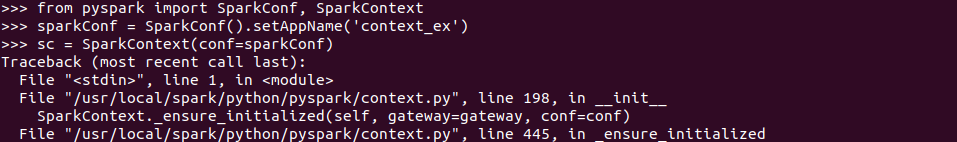

* 멈춘 후에도 오류가 발생한다면, exit()명령어를 통해 spark 환경을 나간 후 다시 들어와서 sc.stop()을 먼저 실행해준뒤 위의 절차를 반복해주면 아래와 같이 올바르게 실행이 되는 것을 알 수 있다.

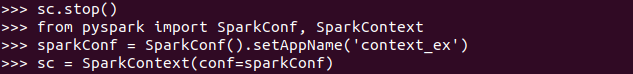

* SparkConf(): 명령어 체인을 통해 Spark application의 설정을 관리
* SparkContext()<br>
    - SparkContext 생성
    - builder를 통해 명령어 체인으로 설정을 입력하는 SparkSession과 달리 설정 객체(sparkConf)를 생성 후 인자로 전달받아 SparkContext객체 생성
    - SparkSession을 통해 SparkContext가 생성되어 있는 경우라면 동일한 JVM에서 두개 이상의 SparkContext가 종시에 실행될 수 없으므로 생성이 안되고 에러가 발생(기존 SparkContext를 종료해야 한다.)

# 7. Spark UI

* Spark는 그래픽 유저 인터페이스(Graphical User Interface, GUI)를 사용하여 다양한 레벨(job, stage, task)에서의 Spark애플리케이션 정보 제공
* 배포 모드에 맞춰 Driver program이 웹 UI를 띄우며 기본적으로 4040포트를 사용
* 다음과 같은 정보를 획득
    - 스케줄러의 stage 와 task 목록
    - RDD크기와 메모리 사용 요약
    - 환경 정보
    - 실행중인 executor 정보
    - 모든 Spark SQL 쿼리

* 로컬모드에서는 spark 구동 시 나오는 주소인 http://master:4040 를 ubuntu상 파이어폭스 브라우저에 검색하여 들어간다면 아래와 같이 정상수행이 되는 것을 알 수 있다.
* pyspark 실행 시 웹 UI에 접속 가능한 주소가 출력됨

* 사용자의 입력이 어떻게 job, stage, task로 바뀌는지 살펴볼 수 있으며 DAG또한 확인 가능하다.

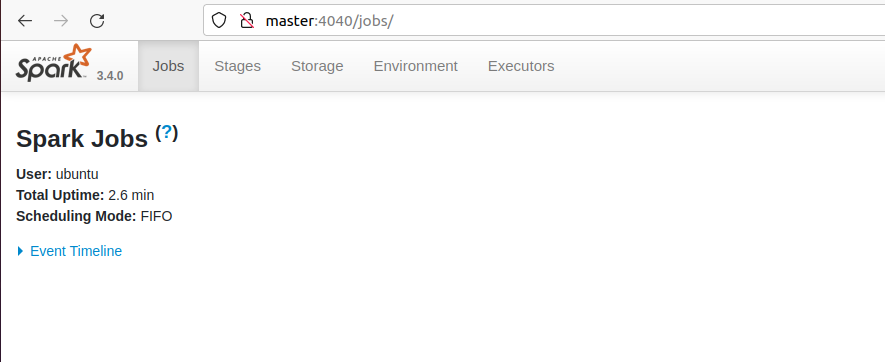

# 8. Spark Application 실습

* M&M 초콜릿의 색깔과 주별로 집계하는 스파크 프로그램
* 각 주별로 학생들이 어떤 색깔의 M&M을 좋아하는지 확인

In [ ]:
# 1. Ubuntu터미널에서 경로 설정 이후 데이터 다운로드
# 실습 디렉토리 spark_ex01 생성 후 진입
mkdir spark_ex01
cd spark_ex01

In [ ]:
# spark_01내 data 디렉토리 생성 후 진입
mkdir data
cd data

# 데이터 다운로드
wget https://github.com/databricks/LearningSparkV2/raw/master/chapter2/py/src/data/mnm_dataset.csv
    
# 경로는 이후 커맨드 라인 인자에 사용되므로 유념하여 설정

In [ ]:
# 2. 집계프로그램을 구현한 mnmcount.py파일을 작성하여 spark_ex01에 저장
# mnmcount.py 파일 생성
vi mnmcount.py

In [ ]:
# 코드 작성
import sys
# spark shell이 아닌 경우에는 SparkSession을 import하여 객체 생성 필요
from pyspark.sql import SparkSession

# 이 python 스크립트가 모듈로써 import 되는 것이 아닌, 직접 실행될 때만 아래 if절 수행
if __name__ == "__main__":
    # sys.argv는 커맨드 라인의 인자들을 담는 list
    # 해당 list는 전달되는 n개의 인자 만큼 (sys.argv[0], sys.argv[1], ..., sys.argv[n])의 형태로 생성됨
    # 아래 Spark.Job 제풀 시 mnmcount.py, data/mnmdataset.csv 두 가지 인자 전달
    # 만약 커맨드 라인 인자 수가 다르다면 아래 에러메시지를 출력하고 프로그램 종료
    if len(sys.argv) != 2:
        print("Usage: mnmcount <file>", file=sys.stderr)
        # -1: 에러로 인한 프로그램 종료
        sys.exit(-1)
        
    # SparkSession API를 사용하여  SparkSession 객체 생성
    # Spark shell(pyspark)에서는 SparkSession 객체가 자동생성되었지만, 여기서는 직접 생성해야 함
    spark = (SparkSession.builder
        .appName("PythonMnMCount")
        .getOrCreate())
    
    # 커맨드 라인 인자 list에서 M&M 데이터의 파일 경로를 가져와 mnm_file 변수에 저장
    mnm_file = sys.argv[1]
    # 데이터를 읽어와 데이터프레임 mnm_df로 저장
    mnm_df = (spark.read.format("csv")     # 데이터는 CSV형식
        .option("header", "true")         # 첫 행은 header이며 첫 행의 데이터는 column
        .option("inferSchema", "true")      # 데이터 차임 추론(스키마 추론) 활성화
        .load(mnm_file))                   # 지정된 경로(mnm_file)에 있는 파일을 읽어옴
    # option('header', 'true'): header옵션을 사용(true)한다
    # option('inferSchema', 'true'): 활성화를 안하면 (False)모든 데이터를 문자열로 인식
    
    # mnm_df의 상위 5개 행 출력
    mnm_df.show(n = 5, truncate = False)
    # truncate = False
    # 각 필드 값을 자르지 않고 그대로 출력
    # 설정하지 않거나 True인 경우 화면에 표시되는 너비에 맞춰 값이 잘림
    
    # 데이터를 집계하여 State와 Color 기준 판매량이 가장 많은 순서로
    # 내림차순된 새로운 DataFrame인 count_mnm_df생성
    count_mnm_df =  (mnm_df.select("State", "Color", "Count")         # 명시된 3개 컬럼 선택
                    .groupBy("State", "Color")                      # State와 Color기준 데이터 그룹화
                    .sum("Count")                                 # 각 그룹의 Count 컬럼 합계 계산
                    .orderBy("sum(Count)", ascending = False))   # sum(Count)를 기준으로 내림차순 정렬
    
    # count_mnm_df의 상위 60개 데이터 출력
    count_mnm_df.show(n = 60, truncate = False)
    
    # count_mnm_df의 전체 행 수 출력
    print("Total Rows = %d" % (count_mnm_df.count()))
    # count_mnm_df.count(): count_mnm_df의 전체 행 갯수 반환
    
    # 새로운 DataFrame인 ca_count_mnm_df 생성
    ca_count_mnm_df = (mnm_df.select("*")
                        .where(mnm_df.State == "CA")
                        .groupBy("State", "Color")
                        .sum("Count")
                        .orderBy("sum(Count)", ascending = False))
    
    # ca_count_mnm_df의 상위 10개 출력
    ca_count_mnm_df.show(n = 10, truncate = False)
    
    spark.stop()

In [ ]:
# 3. Ubuntu 터미널에서 $SPARK_HOME/bin/spark-submit 스크립트로 작성한 python프로그램을 job으로 제출
# {spark-submit 스크립트}  {제출하는 job}  {데이터}
$SPARK_HOME/bin/spark-submit mnmcount.py data/mnm_dataset.csv

* 그냥 실행 시 로그 메시지가 수없이 출력되어 결과물을 보기 힘들다.
* 아래 명령어를 실행하여 INFO 레벨의 로그 메시지 출력을 비활성화 시킨다.

In [ ]:
# $SPARK_HOME/conf/의 log4j2.properties.template을 복사하여 log4j2.properties 파일 생성
sudo cp log4j2.properties.template log4j2.properties

# log4j2.properties 파일 열기
sudo vi log4j2.properties

* rootLogger.level - info 라인을 WARN으로 수정(로그 메시지를 WARN 레벨까지만 출력)
* ERROR 레벨만 출력하고 싶으면 WARN대신 ERROR로 수정

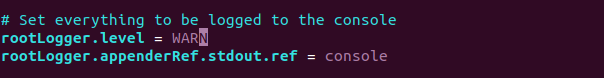

* 로그 메시지를 제거하고 결과를 출력하면 아래와 같이 데이터프레임만 출력이 된다.

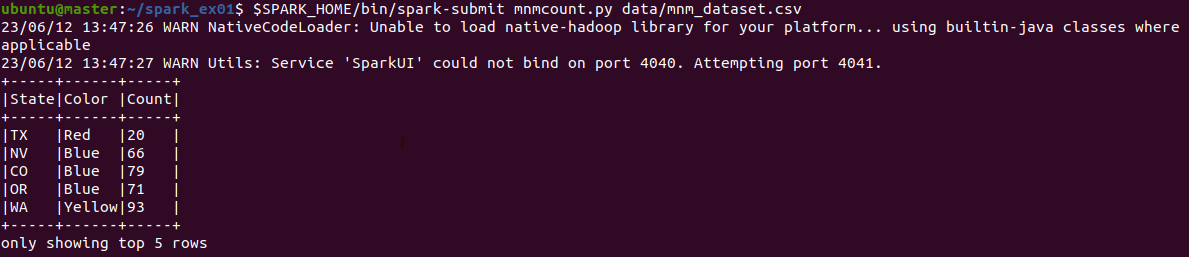

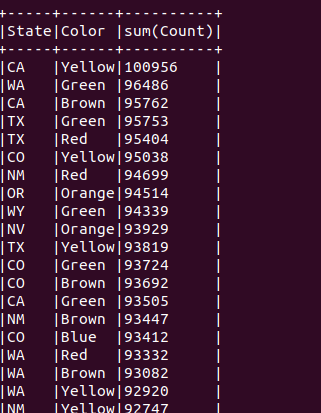

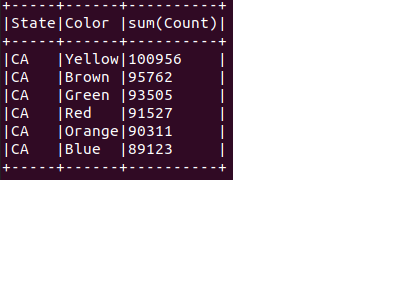